/home/kmay/BACHELOR/.venv/quants/lib/python3.11/site-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:357: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


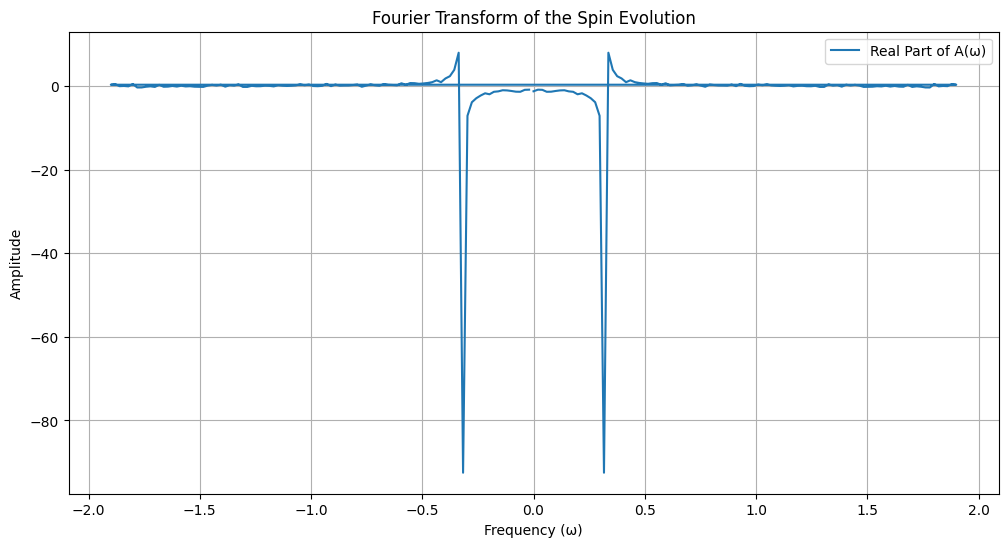

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit import transpile

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime.fake_provider import FakeManilaV2


# Define constants
omega_0 = 1.0  # Frequency of the spin in the magnetic field (in some units)
num_time_steps = 96  # Number of time steps
time_interval = np.pi / (12 * omega_0)  # Time interval τ

# Initialize arrays to store results
times = np.arange(-num_time_steps, num_time_steps + 1) * time_interval
expected_values = np.zeros(len(times))

# Create a simulator backend
backend = FakeManilaV2()

# Loop over each time step
for idx, t in enumerate(times):
    # Create a quantum circuit with 1 qubit and 1 classical bit for measurement
    qc = QuantumCircuit(1, 1)
    
    # Prepare the qubit in a superposition state
    qc.h(0)
    
    # Apply Rz gate to evolve the state
    qc.rz(2 * omega_0 * t, 0)
    
    # Rotate the state for X-basis measurement
    qc.ry(np.pi / 2, 0)
    
    # Measure the qubit in the Z basis (after Ry gate, this corresponds to X-basis)
    qc.measure(0, 0)
    
    qc.draw('mpl', style="iqp")

    
    # Transpile the circuit for the simulator backend
    transpiled_qc = transpile(qc, backend)
    transpiled_circuit = transpile(qc, backend)
    transpiled_circuit.draw('mpl', style="iqp")

    
    # Execute the circuit on the simulator
    job = backend.run(transpiled_qc, shots=1024)
    result = job.result()
    
    # Get the measurement counts
    counts = result.get_counts()
    
    # Calculate the expectation value <σx> = P(0) - P(1)
    p0 = counts.get('0', 0) / 1024
    p1 = counts.get('1', 0) / 1024
    expected_values[idx] = p0 - p1

# Perform Fourier transform on the time evolution
frequencies = np.fft.fftfreq(len(times), time_interval)
fourier_transform = np.fft.fft(expected_values)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.real(fourier_transform), label="Real Part of A(ω)")
plt.title('Fourier Transform of the Spin Evolution')
plt.xlabel('Frequency (ω)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()
